In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
train_data= pd.read_csv(r'C:\Users\saswa\saswata\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv')

In [2]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
train_set = train_data.iloc[:, 1:2].values                   #To keep it as 2D array
train_set.shape

(1258, 1)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler= MinMaxScaler(feature_range=(0,1))           #here we are going to normalise the train_data thats why range is (0,1)
training_set_scaled= scaler.fit_transform(train_set)

In [6]:
'''
Here we will be using timestep for the training data. Here its 60. Which means at a time t, we will use 60 business day datas before t for predicting the out at t+1. So here 
one timestep is 1 business day.
'''
x_train= []
y_train= []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60: i,0])
    y_train.append(training_set_scaled[i,0])

In [7]:
x_train, y_train= np.array(x_train), np.array(y_train)

In [8]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [9]:
x_train.shape

(1198, 60)

In [10]:
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))                     #This is done so correct its dimension before inputing inside a rnn using keras which is (batch_size, timestep, n_inputs)

In [11]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [13]:
regressor= Sequential()

In [14]:
#1st lstm layer
regressor.add(LSTM(units= 50, return_sequences= True, input_shape= (x_train.shape[1], 1)))              #Cuz its a stacked lstm, we put return_seq to True
                                                                                                        #return_sequences True means the output dimension will be same as input dimension,which is 50 in this case.

In [15]:
regressor.add(Dropout(0.2))         #Its a regularization tech which prevents overfitting by randomly switching off or dropping off some neurons (here 20%) in each weight updating cycle ie. epoch.

In [16]:
#2nd LSTM layer
regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))             #Dropout is a layer
#3rd lstm layer
regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2)) 

In [17]:
#4th lstm layer
regressor.add(LSTM(units= 50, return_sequences= False))         #its the last lstm layer before the output layer
                                                                #Here the return_seqences is set to Falso to keep the output dimension as 1
regressor.add(Dropout(0.2)) 

In [18]:
#Output layer
regressor.add(Dense(units=1))

In [19]:
regressor.compile(optimizer='adam', loss= 'mean_squared_error')

In [39]:
#regressor.fit(x_train, y_train, epochs= 100, batch_size= 32)
regressor.fit(x_train, y_train, epochs= 100, batch_size= 32)


Epoch 1/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0041
Epoch 2/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0037
Epoch 3/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0036
Epoch 4/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0033
Epoch 5/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0032
Epoch 6/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0032
Epoch 7/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0035
Epoch 8/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0029
Epoch 9/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0033
Epoch 10/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0028
Epoch 11/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0028
Epoch 12/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0030
Epoch 13/100
38/38 [=====

In [40]:
test_data= pd.read_csv(r'C:\Users\saswa\saswata\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv')

In [41]:
testing_set= test_data.iloc[:, 1:2].values

In [42]:
testing_set

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [43]:
#Here we will concatenate the training set and the test set for the 60 timestep which the neural net will use for prediction
#Also, we wont be normalizing the testing set and then input it into the neural net. We will normalize the concatenated data set for that purpose
#Also we wont be scaling the test set as we should never change the testing data

In [44]:
total_data_set= pd.concat((train_data['Open'], test_data['Open']),axis=0)                       #axis is 0 cuz concat is done along the rows

In [45]:
test_data.shape

(20, 6)

In [46]:
input_data= total_data_set[len(total_data_set)-len(test_data)-60:].values


In [47]:
input_data

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [48]:
input_data= input_data.reshape(-1,1)

In [49]:
input_data

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [50]:
input_data= scaler.transform(input_data)

In [51]:
x_test= []
for i in range(60, 80):
    x_test.append(input_data[i-60:i,0])
x_test= np.array(x_test)
x_test.shape

(20, 60)

In [52]:
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
y_test_predict= regressor.predict(x_test)

In [54]:
y_test_predict= scaler.inverse_transform(y_test_predict)

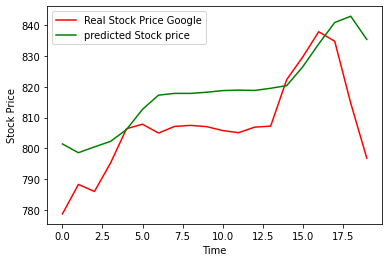

In [55]:
plt.plot(testing_set, color= 'red', label='Real Stock Price Google')
plt.plot(y_test_predict, color= 'green', label='predicted Stock price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [56]:
len(testing_set)

20

In [57]:
len(y_test_predict)

20